#Irish Song v2
This notebook is very similar to the first one except in this one we have more data and we make a few changes to the model.

In [1]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.3.0


In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2020-10-05 13:47:35--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.219.128, 74.125.129.128, 74.125.124.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.219.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2020-10-05 13:47:35 (85.8 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [3]:
data = open('/tmp/irish-lyrics-eof.txt').read()

sentences = data.lower().split("\n")

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
total_words = len(word_index) + 1
print(word_index)
print("The total number of words are: ", total_words)
print("The sentence \"In the town of Athy one Jeremy Lanigan\" as a sequence is :")
print(tokenizer.texts_to_sequences(["In the town of Athy one Jeremy Lanigan"]))

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [4]:
sequences = []
for sentence in sentences:
    token_list = tokenizer.texts_to_sequences([sentence])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        sequences.append(n_gram_sequence)

The sentence is converted to parts inorder to create the learning problem which is to predict the next word. So with parts of the sentence at each instance, the model can predict the next word.

In [5]:
sequences[0:7]

[[51, 12],
 [51, 12, 96],
 [51, 12, 96, 1217],
 [51, 12, 96, 1217, 48],
 [51, 12, 96, 1217, 48, 2],
 [51, 12, 96, 1217, 48, 2, 69],
 [2, 11]]

In [6]:
max_sequence_length = max([len(x) for x in sequences])
# padding = "pre" is really important in this case
padded = np.array(pad_sequences(sequences, maxlen=max_sequence_length, padding="pre"))

In [7]:
padded[0:7]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,   51,   12],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   51,   12,   96],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,   51,   12,   96, 1217],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          51,   12,   96, 1217,   48],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   51,
          12,   96, 1217,   48,    2],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   51,   12,
          96, 1217,   48,    2,   69],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    2,   11]], dtype=int32)

In [8]:
xs, labels = padded[:,:-1], padded[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [9]:
# an array containing all but the last word of the sequence
xs[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 51],
      dtype=int32)

In [10]:
# an array containing the last word in one hot encoding format
# total words is 263 so is the size of this array
ys[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [11]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(total_words, 100, input_length=max_sequence_length-1),# -1 because me separated x and y
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
                             tf.keras.layers.Dense(total_words, activation="softmax")
])
model.summary()
from tensorflow.keras.optimizers import Adam
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.01), metrics=["accuracy"])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 100)           269000    
_________________________________________________________________
bidirectional (Bidirectional (None, 300)               301200    
_________________________________________________________________
dense (Dense)                (None, 2690)              809690    
Total params: 1,379,890
Trainable params: 1,379,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(xs,ys,epochs=100)

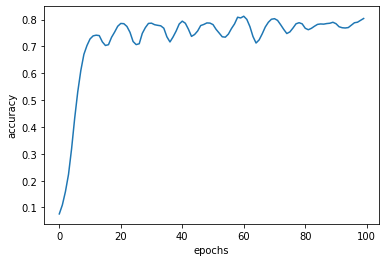

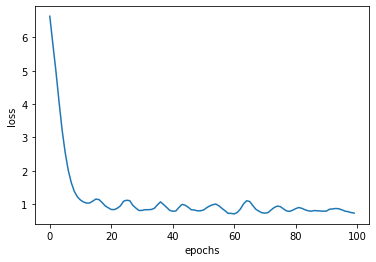

In [13]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("epochs")
    plt.ylabel(string)
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [18]:
seed_text = "Laurence went to dublin"
next_words = 50
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Laurence went to dublin on each breeze there will be as a dove trace had sinking gone he gone and for this a this rocky man love i doesnt love is gone away gone away down by the river sang is a love in your lover someone fair bring there side the foemans love
